# ODE Quick Overview

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import plotly.graph_objects as go
import pandas as pd


### Defining an ODE

In [2]:

def ratio_dydt(y,t):
    dydt = -2*y*t + 5
    return dydt


### Preparing Time Points + Zero Condition

In [10]:
y0 = 0
t = np.linspace(0,10,20)
t2 = np.linspace(0,10,200)

### Solving ODE

In [11]:
y_points = odeint(ratio_dydt, y0, t)
y_more_precise = odeint(ratio_dydt, y0, t2)

### Plotting

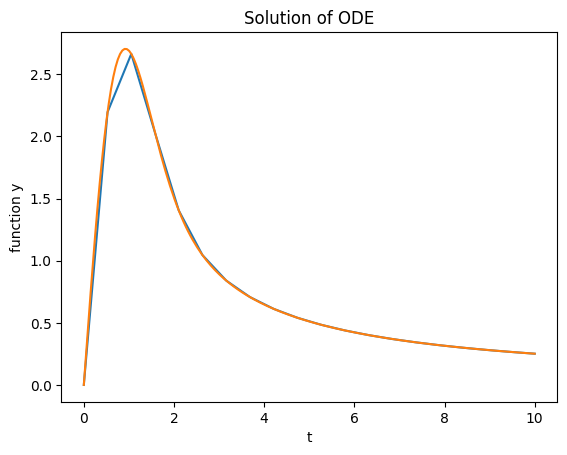

In [12]:
plt.plot(t, y_points, t2, y_more_precise)
plt.title("Solution of ODE")
plt.xlabel("t")
plt.ylabel("function y")
plt.show()

# Coupled Compartments

In [16]:
V_max = 3846
K_M = 874
k_e = 0.019

def ratio_dSdt(S,t):
    X_A, X_P = S
    absorption = V_max * X_A / (K_M + X_A)
    dXAdt = -absorption
    dXPdt = absorption - k_e * X_P
    return [dXAdt, dXPdt]

X_A_0 = 5000 # in milligrams
X_P_0 = 10 # baselines
S_0 = [X_A_0, X_P_0]

t = np.linspace(0,7,200)
solution = odeint(ratio_dSdt, y0=S_0, t=t)

X_P_sol = solution.T[1] # amount of creatine in plasma (mg)  
X_A_sol = solution.T[0] # amount of creatine in available in the gut (mg)  


### Gut and Plasma Creatine in [mg]

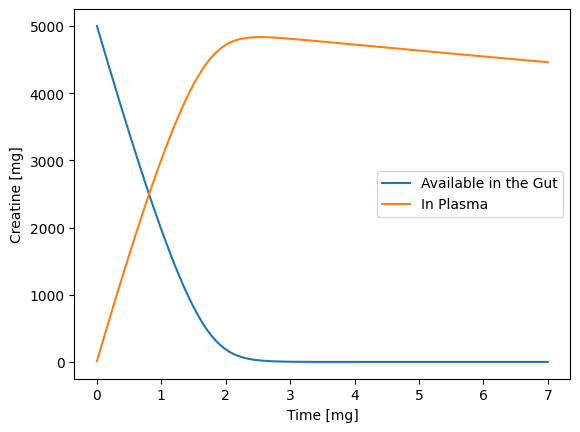

In [25]:
plt.plot(t, X_A_sol, label='Available in the Gut')
plt.plot(t, X_P_sol, label='In Plasma')
plt.legend()
plt.xlabel('Time [mg]')
plt.ylabel('Creatine [mg]')
plt.show()

### Plasma and Muscle Interstitial Concentration

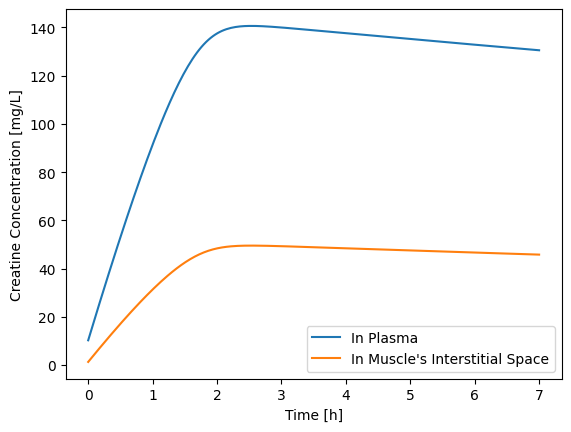

In [26]:
V_D = 37  # L
P_0 = 10   # baseline (mg/L)

C_P = X_P_sol / V_D + P_0 # plasma creatine concentration

F = 0.37 # penetration factor (no units; 0.37-0.47)
I0 = 1.2  # baseline interstitial creatine concentration mg/L
C_T = F * X_P_sol / V_D + I0 # muscle creatine concentration

plt.plot(t, C_P, label='In Plasma')
plt.plot(t, C_T, label='In Muscle\'s Interstitial Space')
plt.legend()
plt.xlabel('Time [h]')
plt.ylabel('Creatine Concentration [mg/L]')
plt.show()